# Abalone

This dataset has been downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Abalone):

_Dua, D. and Graff, C. (2019). UCI Machine Learning Repository <http://archive.ics.uci.edu/ml>. Irvine, CA: University of California, School of Information and Computer Science._

In [1]:
import os
import sys

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

from umap import UMAP

import matplotlib.pyplot as plt

sys.path.append(os.path.abspath("../"))
from kprototypes import KPrototypes, CategoricalTransformer

In [2]:
# Load dataset
abalone_df = pd.read_csv("abalone.csv")
abalone_df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
# Distinguish between categorical and numerical features
categorical_columns = ["Sex"]
numerical_columns = [column for column in abalone_df.columns if column not in categorical_columns]

In [4]:
# Normalize numerical features
numerical_transformer = StandardScaler()
numerical_values = numerical_transformer.fit_transform(abalone_df[numerical_columns].values)

# Encode categorical features
categorical_transformer = CategoricalTransformer()
categorical_values = categorical_transformer.fit_transform(abalone_df[categorical_columns].values)

In [5]:
# Instanciate model
model = KPrototypes(
    n_clusters=8,
    n_iterations=100,
    verbose=1,
)

# Fit dataset
clustership = model.fit_predict(numerical_values, categorical_values)

#1: cost=7007.156670769119, moves=670
#2: cost=6610.681453438185, moves=252
#3: cost=6491.881244517375, moves=137
#4: cost=6454.231025496371, moves=98
#5: cost=6433.6873690511275, moves=70
#6: cost=6423.11552445892, moves=53
#7: cost=6416.628898163112, moves=42
#8: cost=6410.974138102631, moves=37
#9: cost=6406.478896616344, moves=28
#10: cost=6404.389720271372, moves=25
#11: cost=6402.859911674226, moves=32
#12: cost=6400.525620152566, moves=31
#13: cost=6398.376686361378, moves=29
#14: cost=6396.069108515575, moves=30
#15: cost=6394.048431699586, moves=21
#16: cost=6393.394399669656, moves=15
#17: cost=6392.818279857811, moves=16
#18: cost=6392.223913860485, moves=16
#19: cost=6391.660884563454, moves=8
#20: cost=6391.548011166218, moves=4
#21: cost=6391.421909321731, moves=2
#22: cost=6391.392614769875, moves=3
#23: cost=6391.333252401699, moves=3
#24: cost=6391.2312272536365, moves=3
#25: cost=6391.17455618361, moves=1
#26: cost=6391.164851005691, moves=1
#27: cost=6391.15500415946

In [6]:
# Project in 2D plane
umap = UMAP(verbose=1)
projection = umap.fit_transform(np.hstack([numerical_values, categorical_values]))

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=None, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=1)
Construct fuzzy simplicial set
Wed Jun 24 11:09:04 2020 Finding Nearest Neighbors
Wed Jun 24 11:09:04 2020 Building RP forest with 8 trees
Wed Jun 24 11:09:07 2020 NN descent for 12 iterations
	 0  /  12
	 1  /  12
	 2  /  12
Wed Jun 24 11:09:31 2020 Finished Nearest Neighbor Search
Wed Jun 24 11:09:36 2020 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 

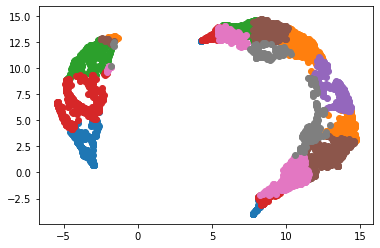

In [7]:
# Show assignment
for k in range(model.n_clusters):
    mask = clustership == k
    plt.scatter(projection[mask, 0], projection[mask, 1])
plt.show()

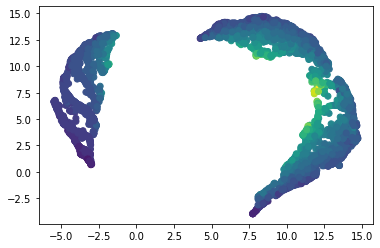

In [8]:
# Show age
plt.scatter(projection[:, 0], projection[:, 1], c=abalone_df["Rings"])
plt.show()